In [22]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [23]:
encoder=OneHotEncoder()
encoder.fit([[0],[1]])

OneHotEncoder()

In [24]:
data=[]
paths=[]
results=[]

for r,d,f in os.walk(r'C:\Users\91902\Desktop\keras\DMproject\brain_tumor_dataset1\yes'):
    for file in f:
        paths.append(os.path.join(r,file))
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if(img.shape==(128,128,3)):
        data.append(np.array(img))
        results.append(encoder.transform([[0]]).toarray())

In [25]:
len(results)

138

In [26]:
len(data)

138

In [27]:
paths = []
for r, d, f in os.walk(r"C:\Users\91902\Desktop\keras\DMproject\brain_tumor_dataset1\no"):
    for file in f:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        results.append(encoder.transform([[1]]).toarray())

In [28]:
len(results)

257

In [29]:
data=np.array(data)
data.shape

(257, 128, 128, 3)

In [30]:
results=np.array(results)
results.shape

(257, 1, 2)

In [31]:
results[0]

array([[1., 0.]])

In [32]:
results=results.reshape(257,2)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(data,results,test_size=0.2,shuffle=True)

In [40]:
x_train.shape

(205, 128, 128, 3)

In [41]:
y_train.shape

(205, 2)

In [42]:
model = keras.Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 64)       

In [43]:
history=model.fit(x_train,y_train,epochs=30,verbose=1,validation_data=(x_test,y_test))

Epoch 1/30
7/7 [==============================] - 8s 1s/step - loss: 16.0249 - val_loss: 14.3153
Epoch 2/30
7/7 [==============================] - 8s 1s/step - loss: 8.7559 - val_loss: 6.1647
Epoch 3/30
7/7 [==============================] - 8s 1s/step - loss: 1.9544 - val_loss: 4.4380
Epoch 4/30
7/7 [==============================] - 8s 1s/step - loss: 1.2540 - val_loss: 4.3486
Epoch 5/30
7/7 [==============================] - 8s 1s/step - loss: 0.8515 - val_loss: 8.6162
Epoch 6/30
7/7 [==============================] - 7s 1s/step - loss: 1.0135 - val_loss: 3.2192
Epoch 7/30
7/7 [==============================] - 8s 1s/step - loss: 0.0984 - val_loss: 3.2534
Epoch 8/30
7/7 [==============================] - 8s 1s/step - loss: 0.0403 - val_loss: 3.2438
Epoch 9/30
7/7 [==============================] - 8s 1s/step - loss: 0.2787 - val_loss: 3.0138
Epoch 10/30
7/7 [==============================] - 8s 1s/step - loss: 0.0750 - val_loss: 2.7886
Epoch 11/30
7/7 [==============================

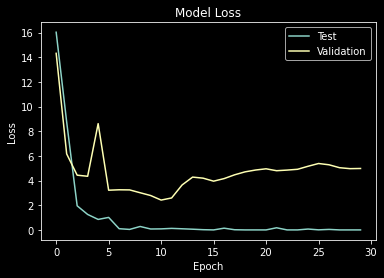

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [48]:
def names(number):
    if number==0:
        return 'a Tumor'
    else:
        return 'not a tumor'

100.0% Confidence This Is a Tumor


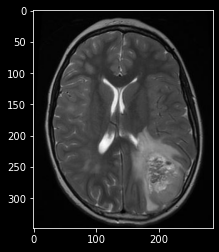

In [49]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\91902\Desktop\keras\DMproject\brain_tumor_dataset1\yes\Y100.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

In [74]:
model.save('CNN_Brain_tumor1.h5')

In [73]:
res

array([[9.9999797e-01, 2.0604884e-06]], dtype=float32)